# Q1

Implement linear regression with multiple variables to predict the prices of
houses. Suppose you are selling your house and you want to know what a good
market price would be. (The dataset is attached as an Excel file). Apply Linear
regression for the above task and find the fittest line. Also, do data preprocessing,
data cleaning, and exploratory data analysis before applying the algorithm to the
model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# First let's load the data into a dataframe

df = pd.read_excel("House Price Prediction dataset.xlsx")
df.head()

,Size (sq ft),Bedrooms,Price (USD)
0,2200,3.0,425000
1,1800,4.0,510000
2,1500,2.0,350000
3,2400,4.0,575000
4,1700,3.0,470000


Was giving excel read issues, but fixed them with dependancies

In [7]:
df

,Size (sq ft),Bedrooms,Price (USD)
0,2200,3.0,425000
1,1800,4.0,510000
2,1500,2.0,350000
3,2400,4.0,575000
4,1700,3.0,470000
5,2000,3.0,100
6,1200,2.0,280000
7,1600,3.0,385000
8,2500,4.0,600000
9,1900,NaN,480000


In [8]:
df.describe()

,Size (sq ft),Bedrooms,Price (USD)
count,58.000000,57.000000,58.000000
mean,3398.275862,757.035088,405518.965517
std,12924.687263,5298.810035,185389.745413
min,400.000000,0.000000,100.000000
25%,1200.000000,2.000000,272500.000000
50%,1800.000000,3.000000,410000.000000
75%,2275.000000,4.000000,547500.000000
max,100000.000000,40000.000000,775000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Size (sq ft)  58 non-null     int64  
 1   Bedrooms      57 non-null     float64
 2   Price (USD)   58 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.5 KB


In [10]:
df.isna().sum()

Size (sq ft)    0
Bedrooms        1
Price (USD)     0
dtype: int64

In [12]:
# there is one missing value in bedrooms. For now, let's remove that row, we can also do imputation if required

df = df.dropna()
df.isna().sum()

Size (sq ft)    0
Bedrooms        0
Price (USD)     0
dtype: int64

In [13]:
df

,Size (sq ft),Bedrooms,Price (USD)
0,2200,3.0,425000
1,1800,4.0,510000
2,1500,2.0,350000
3,2400,4.0,575000
4,1700,3.0,470000
5,2000,3.0,100
6,1200,2.0,280000
7,1600,3.0,385000
8,2500,4.0,600000
10,100000,2.0,300000


In [14]:
df.columns

Index(['Size (sq ft)', 'Bedrooms', 'Price (USD)'], dtype='object')

In [17]:
df.describe()

,Size (sq ft),Bedrooms,Price (USD)
count,57.000000,57.000000,57.000000
mean,3424.561404,757.035088,404212.280702
std,13038.011471,5298.810035,186768.030369
min,400.000000,0.000000,100.000000
25%,1200.000000,2.000000,270000.000000
50%,1800.000000,3.000000,400000.000000
75%,2300.000000,4.000000,550000.000000
max,100000.000000,40000.000000,775000.000000


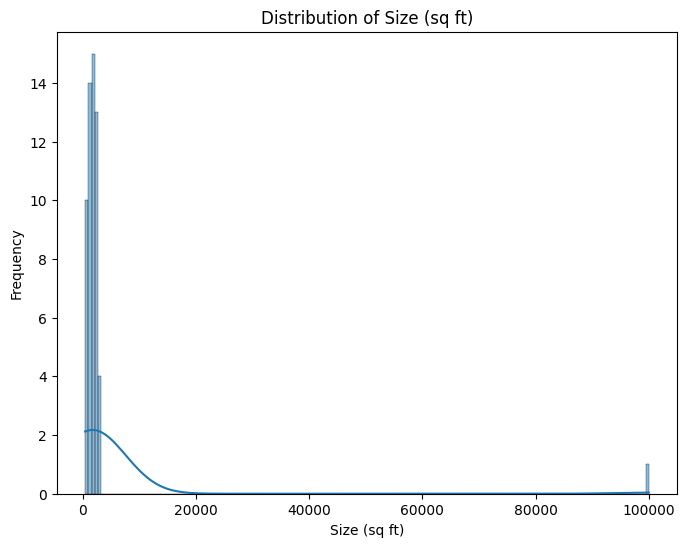

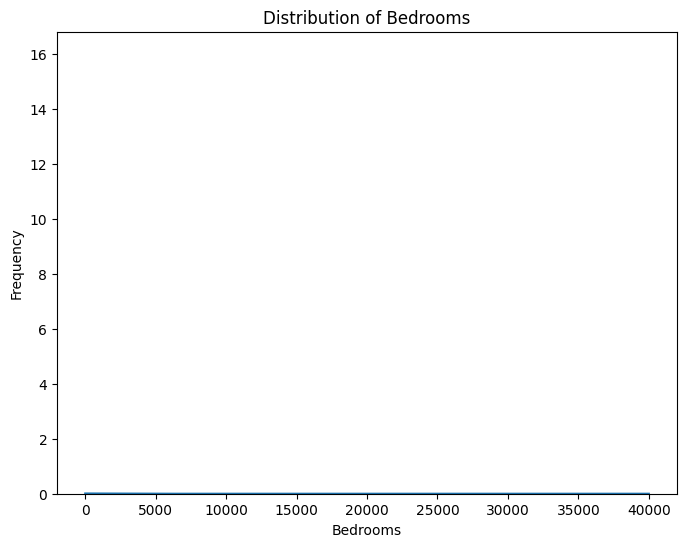

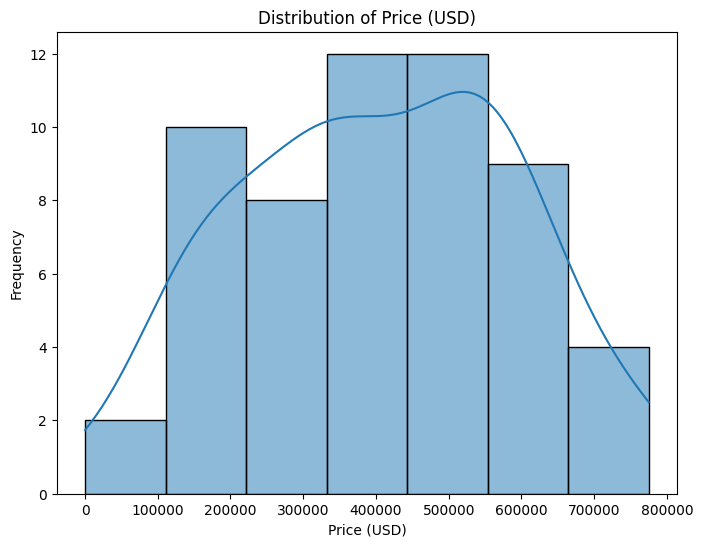

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Histogram for Size (sq ft)
# plt.figure(figsize=(8, 6))
# sns.histplot(df['Size (sq ft)'], kde=True)
# plt.title('Distribution of Size (sq ft)')
# plt.xlabel('Size (sq ft)')
# plt.ylabel('Frequency')
# plt.show()

# # Histogram for Bedrooms
# plt.figure(figsize=(8, 6))
# sns.histplot(df['Bedrooms'], kde=True)
# plt.title('Distribution of Bedrooms')
# plt.xlabel('Bedrooms')
# plt.ylabel('Frequency')
# plt.show()

# Histogram for Price (USD)
plt.figure(figsize=(8, 6))
sns.histplot(df['Price (USD)'], kde=True)
plt.title('Distribution of Price (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

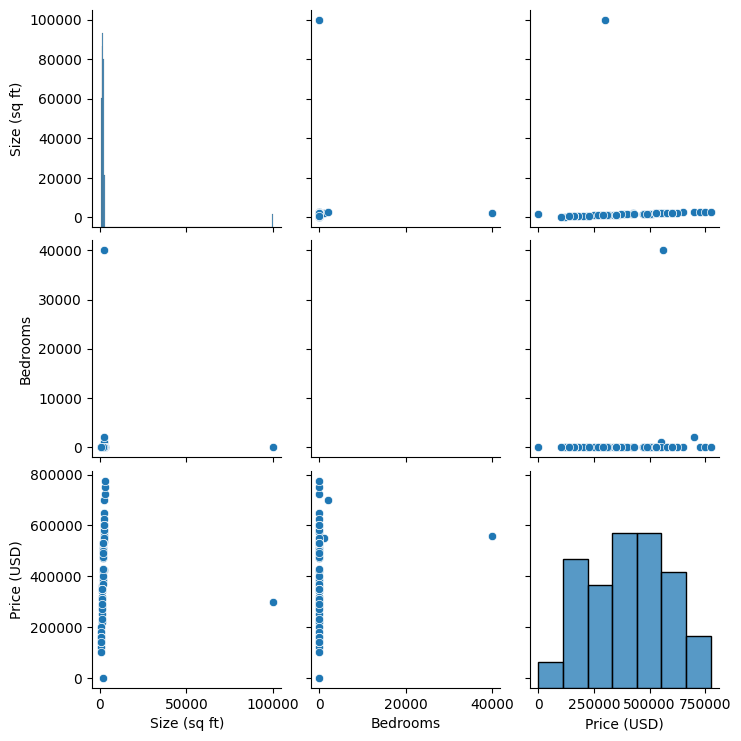

In [19]:
# Pairplot
sns.pairplot(df)
plt.show()

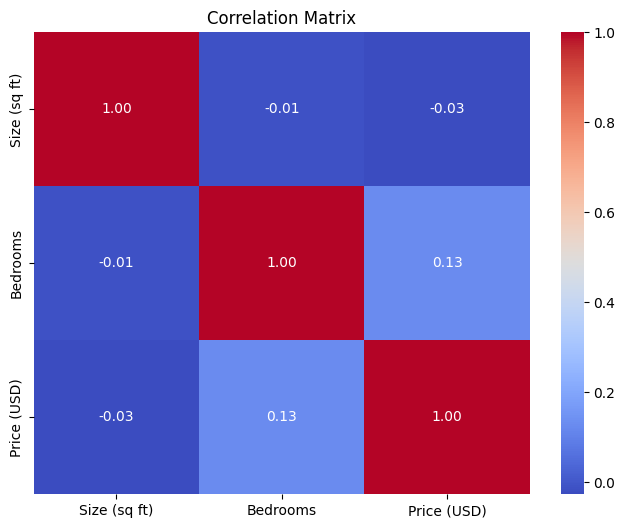

In [20]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

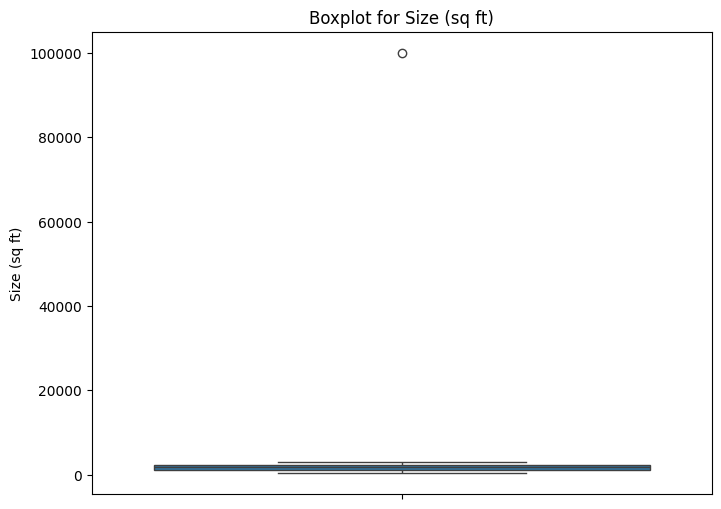

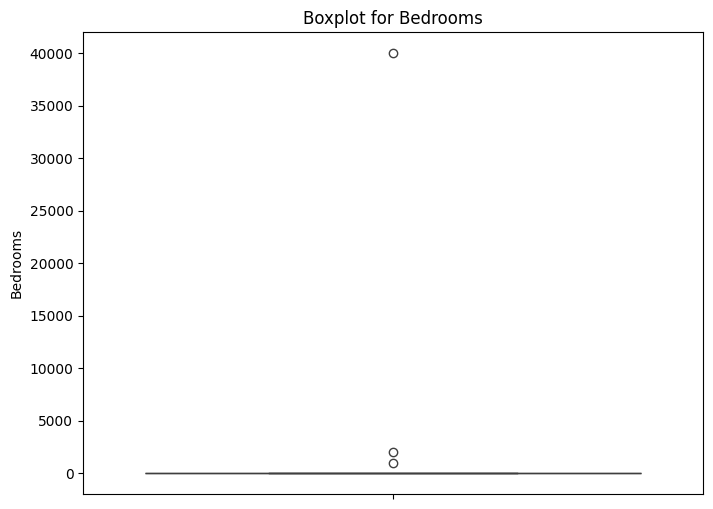

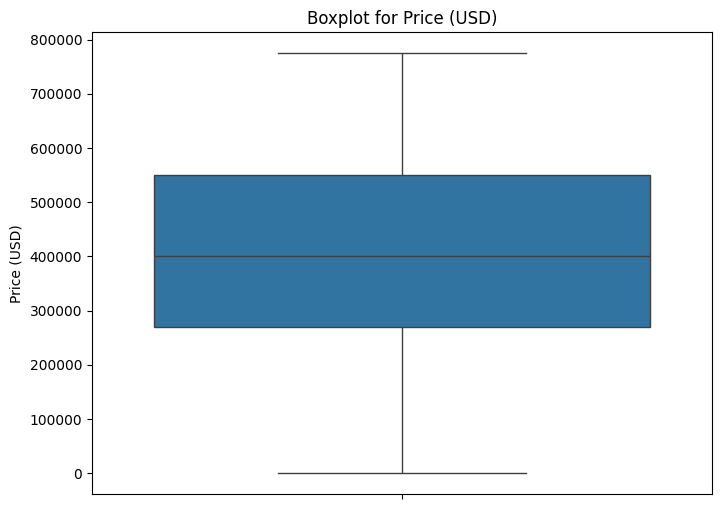

In [21]:
# Boxplot for Size (sq ft)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Size (sq ft)')
plt.title('Boxplot for Size (sq ft)')
plt.show()

# Boxplot for Bedrooms
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Bedrooms')
plt.title('Boxplot for Bedrooms')
plt.show()

# Boxplot for Price (USD)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Price (USD)')
plt.title('Boxplot for Price (USD)')
plt.show()

# Let's do some feature engineering

In [23]:
# Create 'Price per sq ft' feature
df['Price per sq ft'] = df['Price (USD)'] / df['Size (sq ft)']

C:\Users\alikh\AppData\Local\Temp\ipykernel_13488\1453309938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price per sq ft'] = df['Price (USD)'] / df['Size (sq ft)']


In [25]:
df.head()

,Size (sq ft),Bedrooms,Price (USD),Price per sq ft
0,2200,3.0,425000,193.181818
1,1800,4.0,510000,283.333333
2,1500,2.0,350000,233.333333
3,2400,4.0,575000,239.583333
4,1700,3.0,470000,276.470588


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into features (X) and target variable (y)
X = df[['Size (sq ft)', 'Bedrooms']]
y = df['Price (USD)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 419444.1972772541
Coefficients: [-0.62248555  3.89946908]


In [32]:
def evaluate_model(regressor, X_train, X_test, y_train, y_test, tolerance=0.1):
    from sklearn.metrics import mean_squared_error, r2_score

    # Train the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate and print metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy within tolerance
    accuracy = np.mean(np.abs(y_pred - y_test) / y_test <= tolerance)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R^2) Score:", r2)
    print("Accuracy within tolerance (%):", accuracy * 100)



In [33]:
evaluate_model(model, X_train, X_test, y_train, y_test)

Mean Squared Error (MSE): 36166922664.04919
Root Mean Squared Error (RMSE): 190176.03072955643
R-squared (R^2) Score: -0.18968017582797603
Accuracy within tolerance (%): 25.0


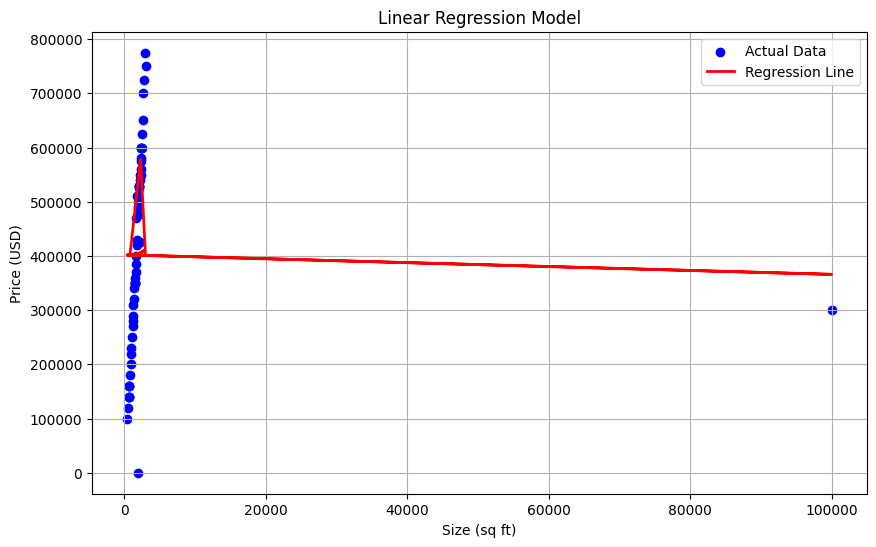

In [29]:
import matplotlib.pyplot as plt

model.fit(X, y)

y_pred_all = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['Size (sq ft)'], y, color='blue', label='Actual Data')

plt.plot(X['Size (sq ft)'], y_pred_all, color='red',
         linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (USD)')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

This outlier is causing a lot of issues as expected. Let's remove it and see how the model performs

In [30]:
df

,Size (sq ft),Bedrooms,Price (USD),Price per sq ft
0,2200,3.0,425000,193.181818
1,1800,4.0,510000,283.333333
2,1500,2.0,350000,233.333333
3,2400,4.0,575000,239.583333
4,1700,3.0,470000,276.470588
5,2000,3.0,100,0.050000
6,1200,2.0,280000,233.333333
7,1600,3.0,385000,240.625000
8,2500,4.0,600000,240.000000
10,100000,2.0,300000,3.000000


In [31]:
import numpy as np

def remove_outliers(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores <= threshold]


# Remove outliers for 'Size (sq ft)' column
df_cleaned = remove_outliers(df, 'Size (sq ft)')

# Print the shape of the cleaned DataFrame to compare with the original
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (57, 4)
Cleaned DataFrame shape: (56, 4)


Again, as expected there's only one outlier

Mean Squared Error (MSE): 22124821192.261616
Root Mean Squared Error (RMSE): 148744.14674958345
R-squared (R^2) Score: 0.4529641152006252
Accuracy within tolerance (%): 83.33333333333334


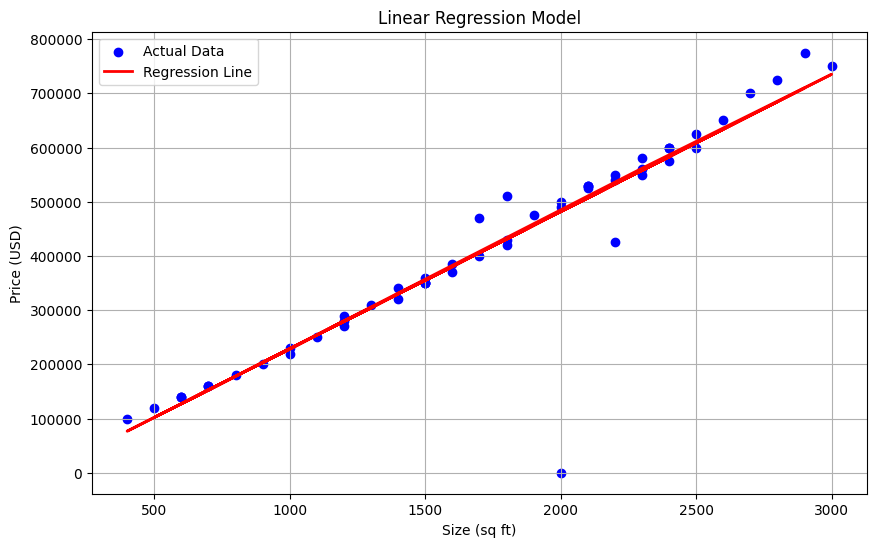

In [34]:
df_cleaned = remove_outliers(df, 'Size (sq ft)')

X = df_cleaned[['Size (sq ft)', 'Bedrooms']]
y = df_cleaned['Price (USD)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()

evaluate_model(model, X_train, X_test, y_train, y_test)
model.fit(X, y)
y_pred_all = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['Size (sq ft)'], y, color='blue', label='Actual Data')
plt.plot(X['Size (sq ft)'], y_pred_all, color='red',
         linewidth=2, label='Regression Line')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (USD)')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

That increases the model's performance by a lot

I feel for the limited data that we have, these results are good enough :)